# Import Lib

In [5]:
import numpy as np
import random
import sys
import itertools
import matplotlib.pyplot as plt
from tabulate import tabulate

# TASK 1

In [14]:
#TASK 1
MAX_RANDOM = sys.maxsize

def sigmoid(x, alpha):
    return 1 / (1 + np.exp(-x * alpha))

def prob_of_neuron(input_vector, weights, threshold, alpha):
    weighted_sum = np.sum(input_vector * weights)
    return sigmoid(weighted_sum - threshold, alpha)

def neuron_model_prob(input_vector, weights, threshold, alpha):
    probability = prob_of_neuron(input_vector, weights, threshold, alpha)
    random_int = random.randint(0, MAX_RANDOM)
    return 1 if random_int <= probability * MAX_RANDOM else 0

def plot_histogram(data, title, xlabel, ylabel, bins='auto'):
    plt.hist(data, bins=bins, edgecolor='black', align='mid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()

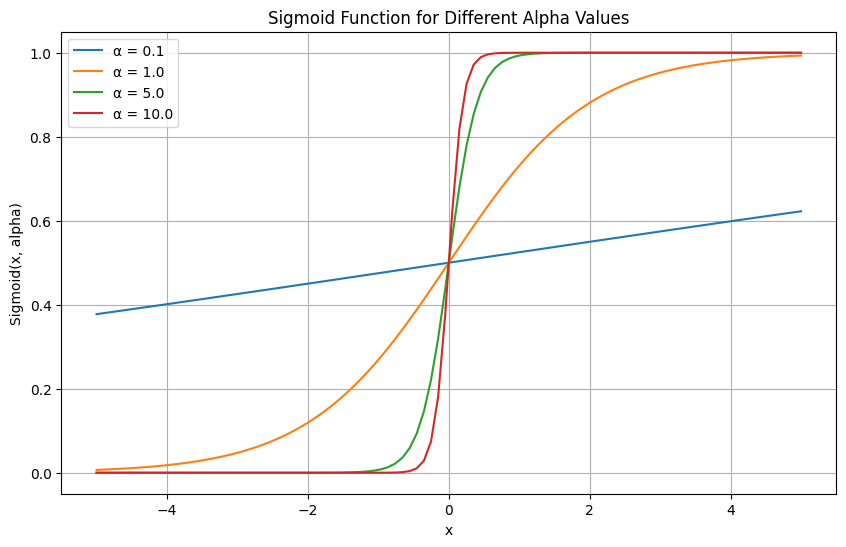

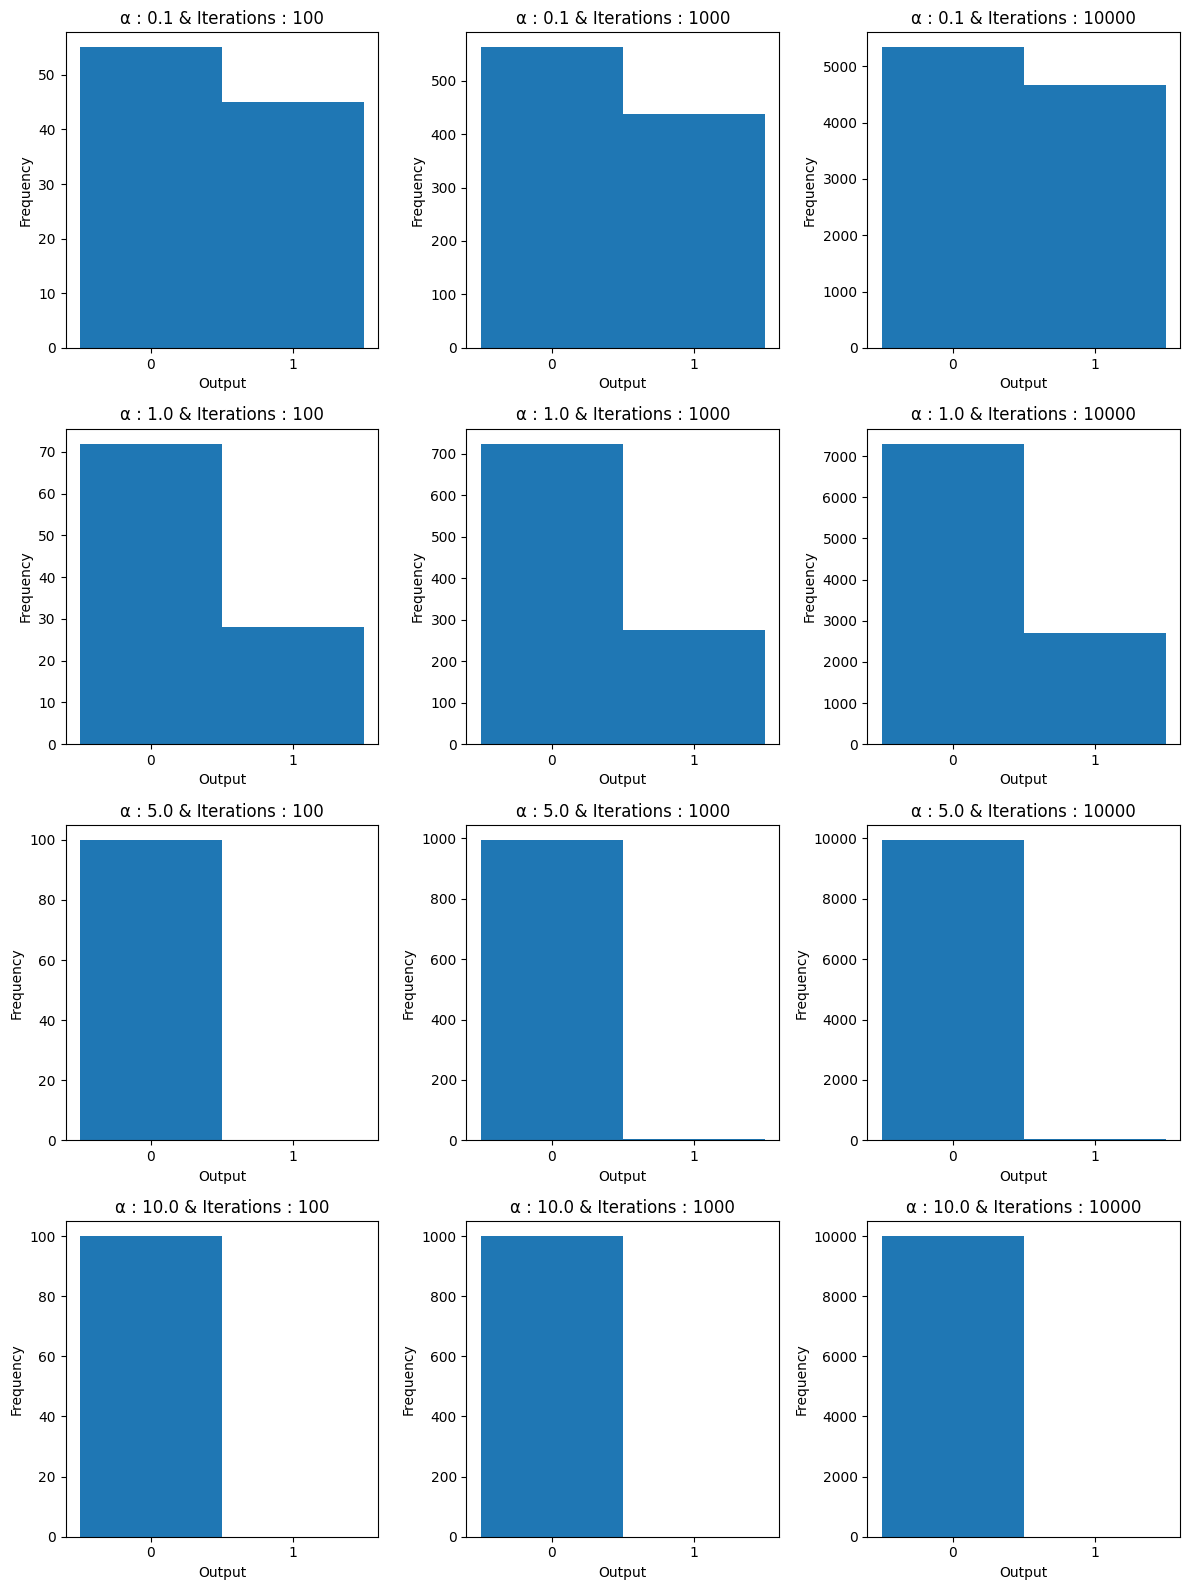

╒════════╤══════════════════════╤══════════════╤══════════════════╤═════════════════╕
│   Gain │   Probability of One │   Iterations │   Number of Zero │   Number of One │
╞════════╪══════════════════════╪══════════════╪══════════════════╪═════════════════╡
│    0.1 │          0.475021    │          100 │               55 │              45 │
├────────┼──────────────────────┼──────────────┼──────────────────┼─────────────────┤
│    0.1 │          0.475021    │         1000 │              562 │             438 │
├────────┼──────────────────────┼──────────────┼──────────────────┼─────────────────┤
│    0.1 │          0.475021    │        10000 │             5334 │            4666 │
├────────┼──────────────────────┼──────────────┼──────────────────┼─────────────────┤
│    1   │          0.268941    │          100 │               72 │              28 │
├────────┼──────────────────────┼──────────────┼──────────────────┼─────────────────┤
│    1   │          0.268941    │         1000 │      

In [32]:
#TASK 1 continue
X = np.array([0, 1, 1, 0])
W = np.array([2, 0.5, -1, -2])
threshold = 0.5
Gain = np.array([0.1, 1, 5, 10])
Iteration = np.array([100, 1000, 10000])

x_values = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 6))
for alpha in Gain:
    y_values = sigmoid(x_values, alpha)
    plt.plot(x_values, y_values, label=f'α = {alpha}')
plt.title('Sigmoid Function for Different Alpha Values')
plt.xlabel('x')
plt.ylabel('Sigmoid(x, alpha)')
plt.legend()
plt.grid(True)
plt.show()

results = []

plt.figure(figsize=(4 * len(Iteration), 4 * len(Gain)))

count = 1
for gain in Gain:
    for iter in Iteration:
        data = np.array([neuron_model_prob(X, W, threshold, gain) for _ in range(iter)])

        count_zero = np.count_nonzero(data == 0)
        count_one = iter - count_zero

        prob_of_one = prob_of_neuron(X, W, threshold, gain)

        results.append([gain, prob_of_one, iter, count_zero, count_one])

        plt.subplot(len(Gain), len(Iteration), count)
        plt.hist(data, bins=[-0.5, 0.5, 1.5], align='mid')
        plt.title(f'α : {gain} & Iterations : {iter}')
        plt.xlabel('Output')
        plt.ylabel('Frequency')
        plt.xticks([0, 1])
        count += 1

plt.tight_layout()
plt.show()

print(tabulate(results, headers=["Gain", "Probability of One", "Iterations", "Number of Zero", "Number of One"], tablefmt='fancy_grid'))

# TASK 2

In [33]:
#TASK 2
def neuron_model_deter(X, W, threshold):
  S = np.sum(X * W)
  return 1 if S >= threshold else 0

def rnn_update_deter(X, W, threshold, update_index):
  other_neurons = np.ones(len(X), dtype=bool)
  other_neurons[update_index] = False
  X[update_index] = neuron_model_deter(X[other_neurons], W[other_neurons], threshold[update_index])
  return X

def rnn_update_prob(X, W, threshold, alpha, update_index):
  other_neurons = np.ones(len(X), dtype=bool)
  other_neurons[update_index] = False
  X[update_index] = neuron_model_prob(X[other_neurons], W[other_neurons], threshold[update_index], alpha)
  return X
def dict_states(N):
  states = np.array(list(itertools.product([0, 1], repeat=N)))
  states_dict = {tuple(x): 0 for x in states}
  return states, states_dict

def plot_bar(x_data, y_data, title, xlabel, ylabel):
    plt.bar(range(len(x_data)), y_data, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(len(x_data)), x_data, rotation='vertical')
    plt.tight_layout()

def winner_takes_all_deter(X, W, threshold, update_order='F'):
  X_old = X.copy()
  count = 0
  X_update_seq = []
  X_update_seq.append(X_old)
  print(f"Original X{' ':<2s}: {X}")
  if update_order == 'R':
    indices = np.arange(len(X) - 1, -1, -1)
  else:
    indices = np.arange(len(X))
  indices = itertools.cycle(indices)
  for update_index in indices:
    W_update = W[update_index]
    X = rnn_update_deter(X, W_update, threshold, update_index)
    print(f"Update X{update_index:<3d} : {X}")
    count = count+1 if np.array_equal(X, X_old) else 0
    X_old = X.copy()
    X_update_seq.append(X_old)
    if np.sum(X == 1) == 1 and np.sum(X == 0) == len(X) - 1 and count >= 3:
        return X, X_update_seq

def rnn_optimization_prob(X, W, threshold, alpha, iterations, dictionary, update_order='F'):
  if update_order == 'R':
    indices = np.arange(len(X) - 1, -1, -1)
  else:
    indices = np.arange(len(X))
  indices = itertools.cycle(indices)
  for i, update_index in zip(range(iterations), indices):
    W_update = W[update_index]
    X = rnn_update_prob(X, W_update, threshold, alpha, update_index)
    current_state = tuple(X)
    dictionary[current_state] += 1
  return dictionary

def rnn_energy(X, W, threshold, C=0):
  term_1st = term_2nd = 0
  for i in range(len(X)):
    for j in range(len(X)):
      term_1st += W[i][j]*X[i]*X[j]
  for i in range(len(X)):
    term_2nd += X[i]*threshold[i]
  return  (-1*term_1st/2) + term_2nd + C

def energy_sequence_state(update_seq, energy_dict, energy_list):
  for initial_X, sublist in enumerate(update_seq):
    energy_list_row = []
    for iteration, state_X in enumerate(sublist):
      energy_list_row.append(energy_dict[tuple(state_X)])
    energy_list.append(energy_list_row)

def plot_3D(Y, graph_index, label_name, title_name):
  for i in range(len(Y)):
      x = np.arange(len(Y[i]))
      y = np.full_like(x, i)
      z = Y[i]
      axes[graph_index].plot(x, y, z, label=label_name[i])
  axes[graph_index].set_title(title_name)
  axes[graph_index].set_xlabel('Iteration')
  axes[graph_index].set_ylabel('State')
  axes[graph_index].set_zlabel('Energy')
  axes[graph_index].legend()

## TASK 2.1

In [34]:
#TASK 2.1
N = 3
X, _ = dict_states(N)
W = np.full((N, N), -2)
np.fill_diagonal(W, 0)
threshold = np.full(N, -1)

headers = ["Initial state", "Winner (Forward)", "Winner (Reversed)"]
results = []

update_seq_forward = []
update_seq_reversed = []

for X_orig in X:
  print(f"X_int       : {X_orig}")
  X_orig_c = X_orig.copy()
  print(f"Forward order")
  X_win, X_seq_f = winner_takes_all_deter(X_orig_c, W, threshold, update_order='F')
  update_seq_forward.append(X_seq_f)
  result_row = [tuple(X_orig), tuple(X_win)]
  X_orig_c = X_orig.copy()
  print(f"Reverse order")
  X_win, X_seq_r = winner_takes_all_deter(X_orig_c, W, threshold, update_order='R')
  update_seq_reversed.append(X_seq_r)
  result_row.append(tuple(X_win))
  results.append(result_row)
  print("-"*40)

print(tabulate(results, headers=headers, tablefmt='fancy_grid'))

X_int       : [0 0 0]
Forward order
Original X  : [0 0 0]
Update X0   : [1 0 0]
Update X1   : [1 0 0]
Update X2   : [1 0 0]
Update X0   : [1 0 0]
Reverse order
Original X  : [0 0 0]
Update X2   : [0 0 1]
Update X1   : [0 0 1]
Update X0   : [0 0 1]
Update X2   : [0 0 1]
----------------------------------------
X_int       : [0 0 1]
Forward order
Original X  : [0 0 1]
Update X0   : [0 0 1]
Update X1   : [0 0 1]
Update X2   : [0 0 1]
Reverse order
Original X  : [0 0 1]
Update X2   : [0 0 1]
Update X1   : [0 0 1]
Update X0   : [0 0 1]
----------------------------------------
X_int       : [0 1 0]
Forward order
Original X  : [0 1 0]
Update X0   : [0 1 0]
Update X1   : [0 1 0]
Update X2   : [0 1 0]
Reverse order
Original X  : [0 1 0]
Update X2   : [0 1 0]
Update X1   : [0 1 0]
Update X0   : [0 1 0]
----------------------------------------
X_int       : [0 1 1]
Forward order
Original X  : [0 1 1]
Update X0   : [0 1 1]
Update X1   : [0 0 1]
Update X2   : [0 0 1]
Update X0   : [0 0 1]
Update X1

## TASK 2.2

Initial state : [0 0 0] & Update order : Forward


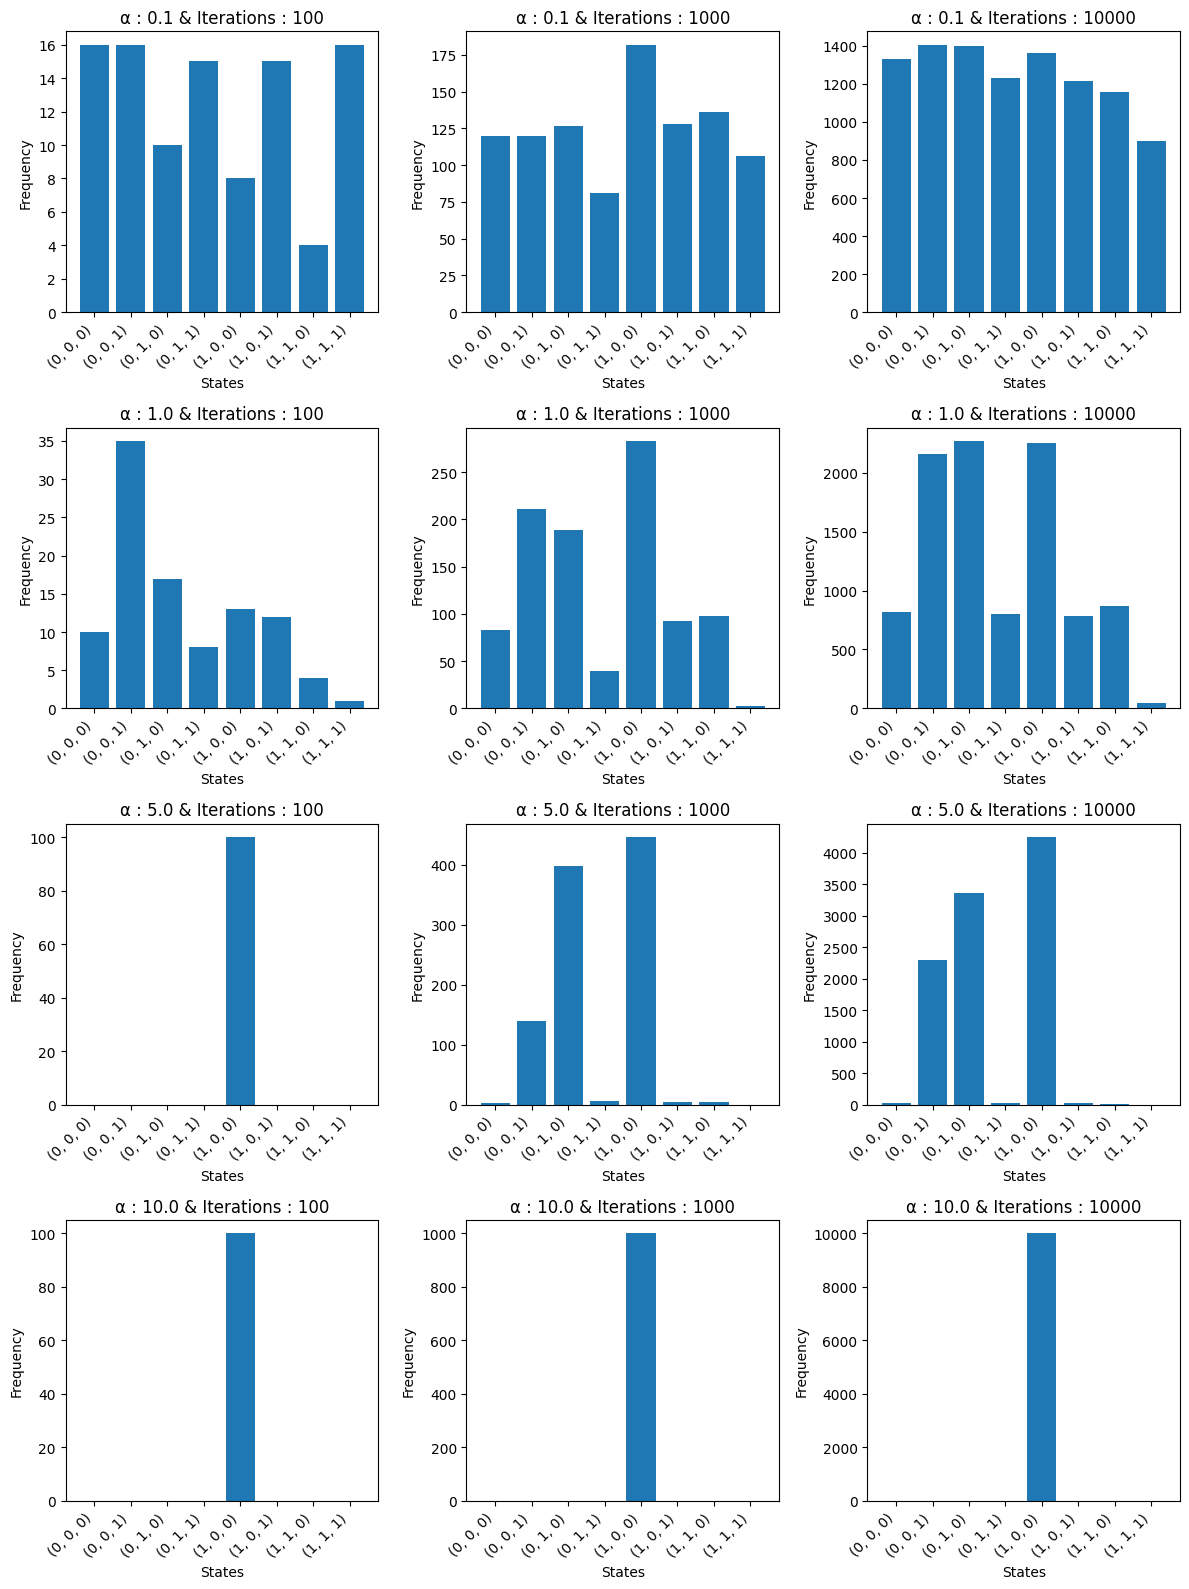

Optimal state (Probabilistic)
╒════════╤══════════════╤═════════════════╤═══════════════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│   Gain │   Iterations │   Max frequency │ Max frequency state   │   [0 0 0] │   [0 0 1] │   [0 1 0] │   [0 1 1] │   [1 0 0] │   [1 0 1] │   [1 1 0] │   [1 1 1] │
╞════════╪══════════════╪═════════════════╪═══════════════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│    0.1 │          100 │              16 │ (0, 0, 0)             │        16 │        16 │        10 │        15 │         8 │        15 │         4 │        16 │
├────────┼──────────────┼─────────────────┼───────────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│    0.1 │         1000 │             182 │ (1, 0, 0)             │       120 │       120 │       127 │        81 │       182 │       128 │       136 

In [35]:
#TASK 2.2
N = 3
X, X_dict = dict_states(N)
W = np.full((N, N), -2)
np.fill_diagonal(W, 0)
threshold = np.full(N, -1)
Gain = np.array([0.1, 1, 5, 10])
Iteration = np.array([100, 1000, 10000])
X_int = X[random.randint(0, X.shape[0]-1)]
update_order = 'F'
print(f"Initial state : {X_int} & Update order : {'Forward' if update_order == 'F' else 'Reversed'}")

headers = ["Gain", "Iterations", "Max frequency", "Max frequency state"] + [str(state) for state in X]
results = []

plt.figure(figsize=(4 * len(Iteration), 4 * len(Gain)))

for gain_idx, gain in enumerate(Gain):
    for iter_idx, iteration in enumerate(Iteration):
        X_dict = {state: 0 for state in X_dict}
        X_int_c = np.copy(X_int)
        rnn_optimization_prob(X_int_c, W, threshold, gain, iteration, X_dict, update_order=update_order)

        max_state, max_frequency = max(X_dict.items(), key=lambda item: item[1])
        frequencies = list(X_dict.values())
        results.append([f"{gain:.2f}", iteration, max_frequency, str(max_state)] + frequencies)

        ax = plt.subplot(len(Gain), len(Iteration), gain_idx * len(Iteration) + iter_idx + 1)
        ax.bar(range(len(X_dict)), frequencies, tick_label=[str(s) for s in X_dict.keys()])
        ax.set_title(f"α : {gain} & Iterations : {iteration}")
        ax.set_xlabel("States")
        ax.set_ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Optimal state (Probabilistic)")
print(tabulate(results, headers=headers, tablefmt='fancy_grid'))

## TASK 2.3

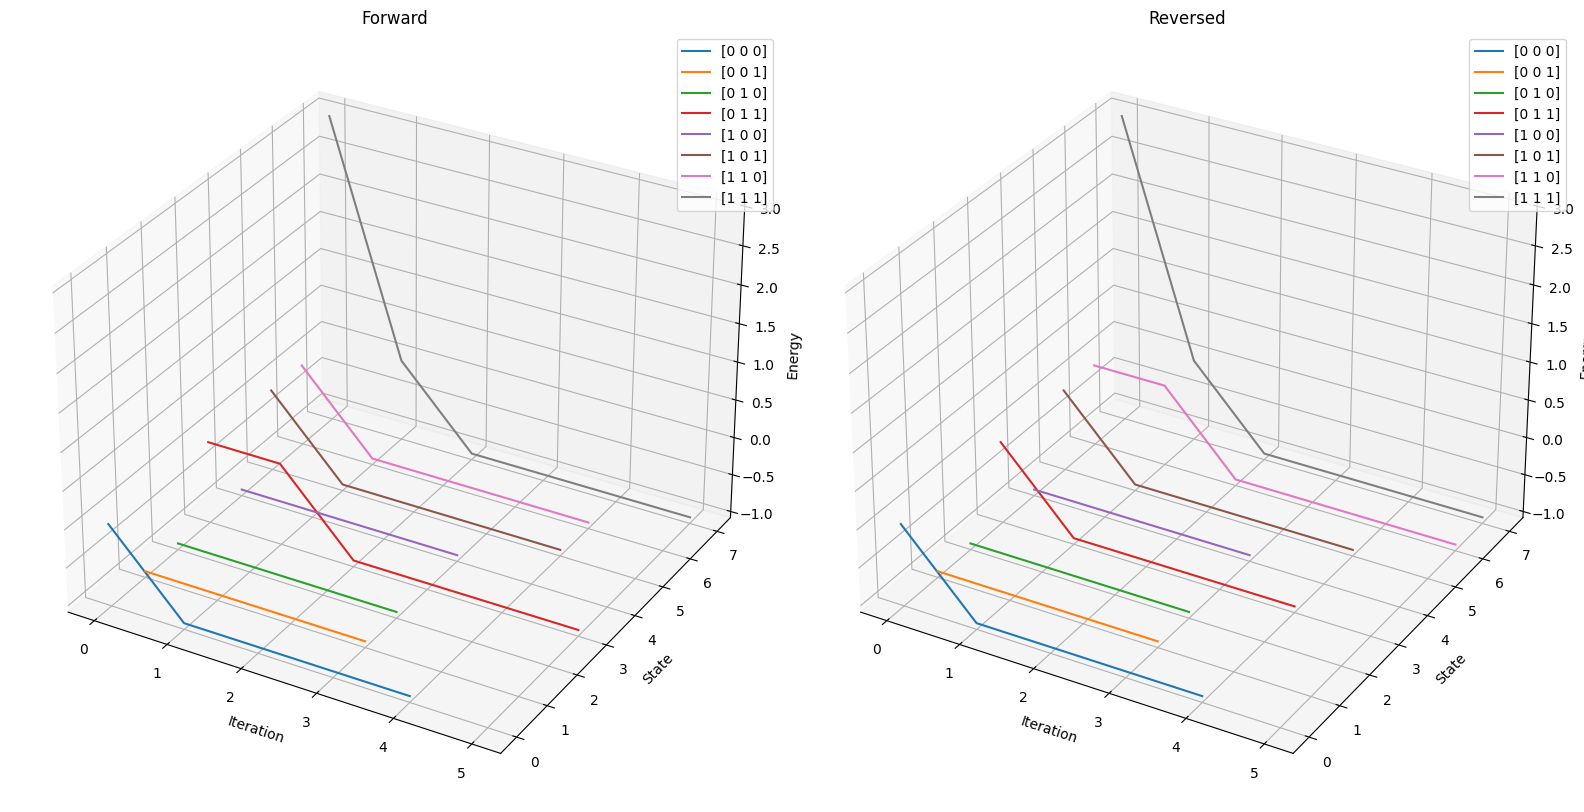

Energy of each state table
╒═══════════╤══════════╕
│ State     │   Energy │
╞═══════════╪══════════╡
│ (0, 0, 0) │        0 │
├───────────┼──────────┤
│ (0, 0, 1) │       -1 │
├───────────┼──────────┤
│ (0, 1, 0) │       -1 │
├───────────┼──────────┤
│ (0, 1, 1) │        0 │
├───────────┼──────────┤
│ (1, 0, 0) │       -1 │
├───────────┼──────────┤
│ (1, 0, 1) │        0 │
├───────────┼──────────┤
│ (1, 1, 0) │        0 │
├───────────┼──────────┤
│ (1, 1, 1) │        3 │
╘═══════════╧══════════╛


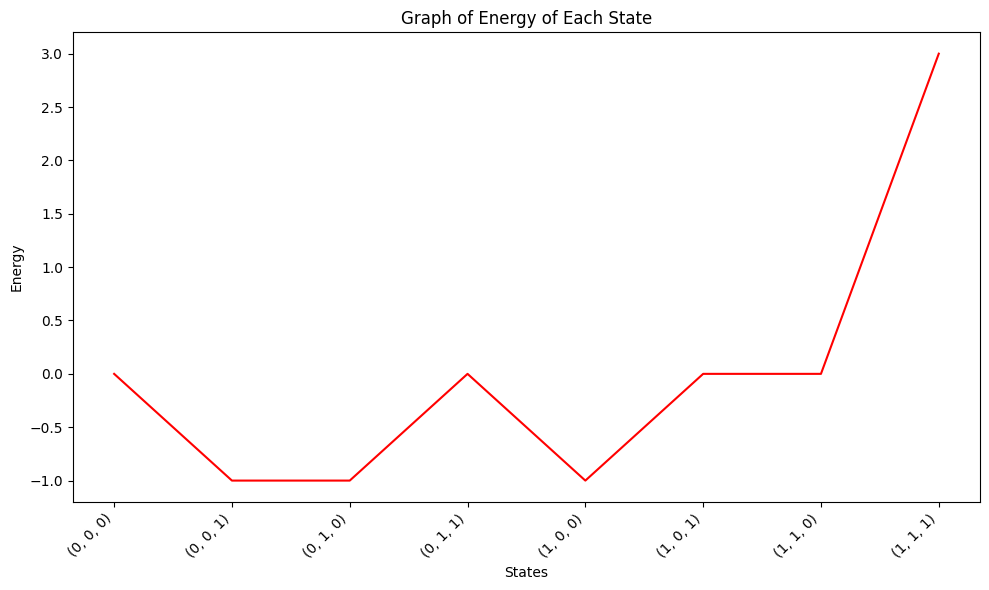

In [36]:
#TASK 2.3
N = 3
X, energy_dict = dict_states(N)
W = np.full((N, N), -2)
np.fill_diagonal(W, 0)
threshold = np.full(N, -1)

for states in energy_dict:
    energy = rnn_energy(states, W, threshold, C=0)
    energy_dict[states] = energy

energy_forward = []
energy_sequence_state(update_seq_forward, energy_dict, energy_forward)

energy_reversed = []
energy_sequence_state(update_seq_reversed, energy_dict, energy_reversed)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})
plot_3D(energy_forward, 0, X, "Forward")
plot_3D(energy_reversed, 1, X, "Reversed")
plt.tight_layout()
plt.show()

print("Energy of each state table")
results = [(state, energy) for state, energy in energy_dict.items()]
headers = ["State", "Energy"]
table = tabulate(results, headers=headers, tablefmt='fancy_grid')
print(table)

state_labels = [str(state) for state in energy_dict.keys()]
energy_values = list(energy_dict.values())
plt.figure(figsize=(10, 6))
plt.plot(state_labels, energy_values, color='red')
plt.xlabel('States')
plt.ylabel('Energy')
plt.title('Graph of Energy of Each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# TASK 3

In [37]:
#TASK 3
def rnn_optimization_deter(X, W, threshold, update_order = 'F'):
  X_old = X.copy()
  count = 0
  X_update_seq = []
  X_update_seq.append(X_old)
  if update_order == 'R':
      indices = np.arange(len(X) - 1, -1, -1)
  else:
      indices = np.arange(len(X))
  indices = itertools.cycle(indices)
  for update_index in indices:
    W_update = W[update_index]
    X = rnn_update_deter(X, W_update, threshold, update_index)
    count = count+1 if np.array_equal(X, X_old) else 0
    X_old = X.copy()
    X_update_seq.append(X_old)
    if count >= 3:
      return X, X_update_seq

Energy of each state table
╒══════════════╤══════════╕
│ State        │   Energy │
╞══════════════╪══════════╡
│ (0, 0, 0, 0) │        0 │
├──────────────┼──────────┤
│ (0, 0, 0, 1) │      -13 │
├──────────────┼──────────┤
│ (0, 0, 1, 0) │      -15 │
├──────────────┼──────────┤
│ (0, 0, 1, 1) │      -24 │
├──────────────┼──────────┤
│ (0, 1, 0, 0) │       49 │
├──────────────┼──────────┤
│ (0, 1, 0, 1) │       32 │
├──────────────┼──────────┤
│ (0, 1, 1, 0) │       14 │
├──────────────┼──────────┤
│ (0, 1, 1, 1) │        1 │
├──────────────┼──────────┤
│ (1, 0, 0, 0) │      -16 │
├──────────────┼──────────┤
│ (1, 0, 0, 1) │      -27 │
├──────────────┼──────────┤
│ (1, 0, 1, 0) │      -27 │
├──────────────┼──────────┤
│ (1, 0, 1, 1) │      -34 │
├──────────────┼──────────┤
│ (1, 1, 0, 0) │       23 │
├──────────────┼──────────┤
│ (1, 1, 0, 1) │        8 │
├──────────────┼──────────┤
│ (1, 1, 1, 0) │       -8 │
├──────────────┼──────────┤
│ (1, 1, 1, 1) │      -19 │
╘══════════════╧═════

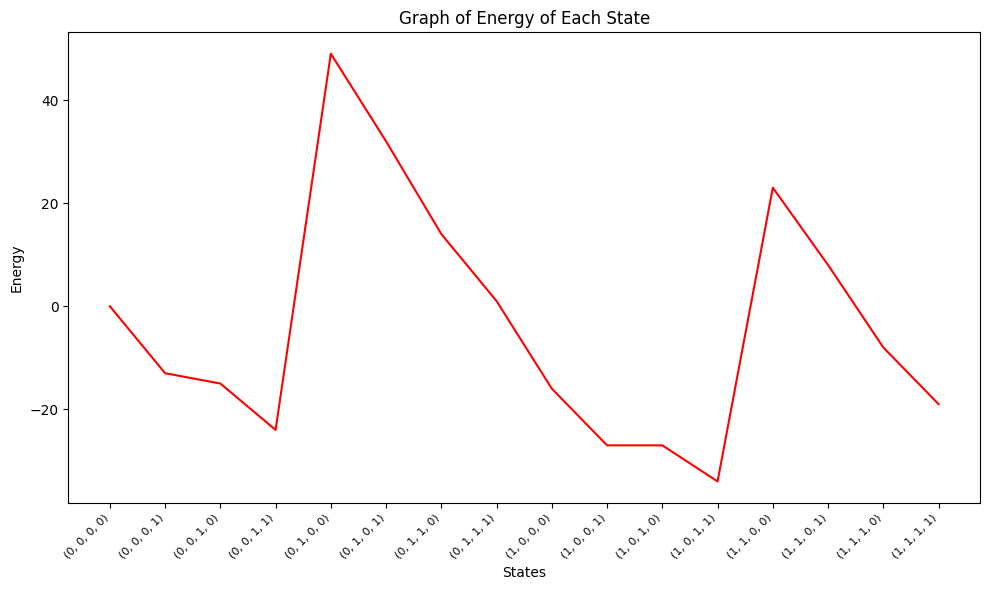

In [38]:
#TASK 3 continue
N = 4
W = np.array([[ 0, 10, -4, -2],
                     [10,  0, 20,  4],
                     [-4, 20,  0, -4],
                     [-2,  4, -4, 0  ]])


threshold = np.array([-16, 49, -15, -13])
C = 34
X, energy_dict = dict_states(N)

for states in energy_dict:
    energy = rnn_energy(states, W, threshold, C=0)
    energy_dict[states] = energy

print("Energy of each state table")
results = [(state, energy) for state, energy in energy_dict.items()]
headers = ["State", "Energy"]
table = tabulate(results, headers=headers, tablefmt='fancy_grid')
print(table)

state_labels = [str(state) for state in energy_dict.keys()]
energy_values = list(energy_dict.values())
plt.figure(figsize=(10, 6))
plt.plot(state_labels, energy_values, color='red')
plt.xlabel('States')
plt.ylabel('Energy')
plt.title('Graph of Energy of Each State')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

## Deterministic

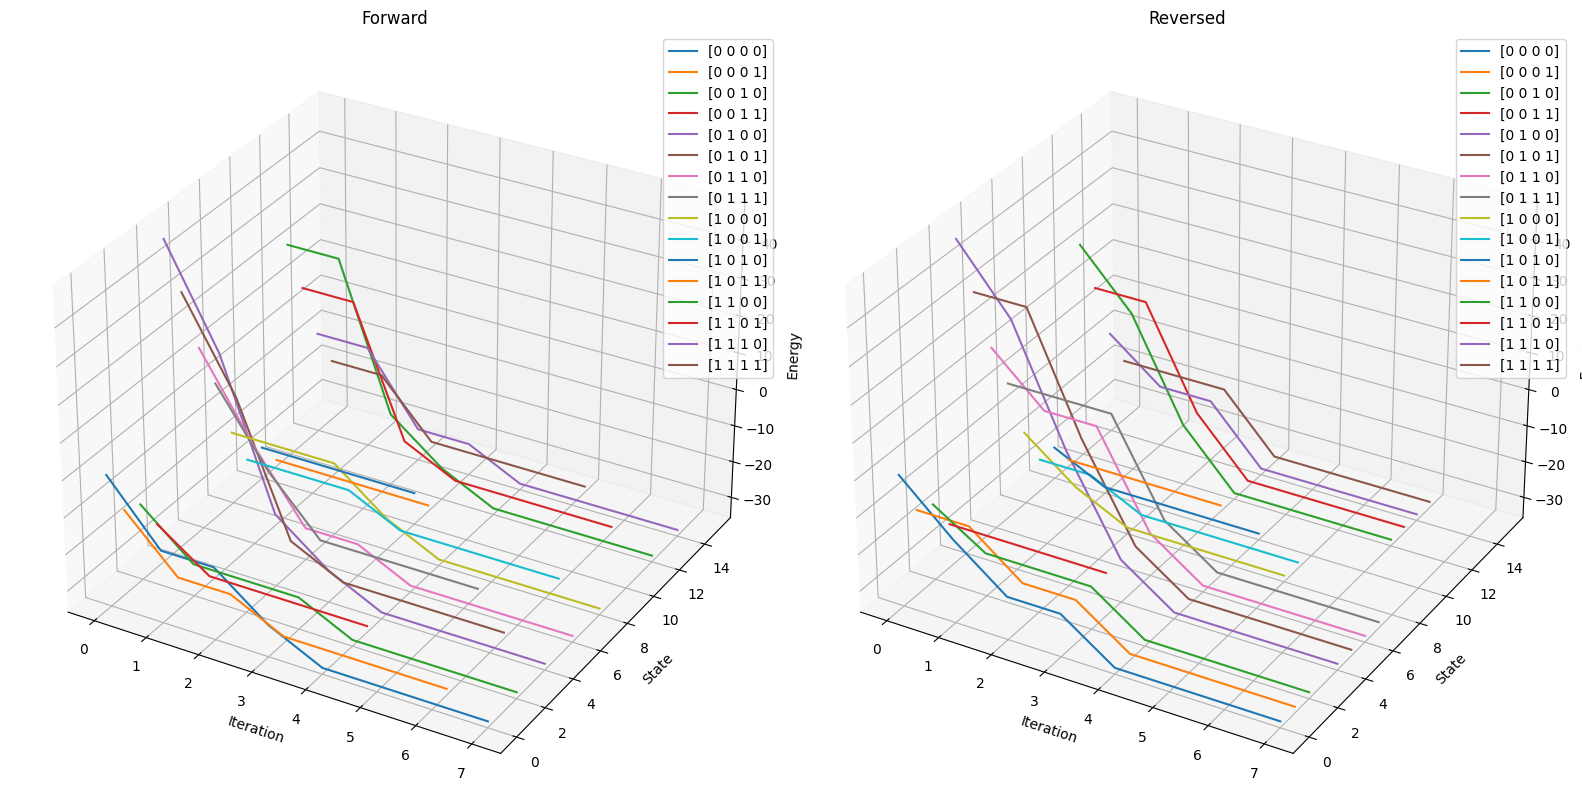

Optimal state (Deterministic)
╒═════════════════╤════════════════════════════════╤═════════════════════════════════╕
│ Initial state   │ Optimal state(Forward order)   │ Optimal state(Reversed order)   │
╞═════════════════╪════════════════════════════════╪═════════════════════════════════╡
│ (0, 0, 0, 0)    │ (1, 0, 1, 1)                   │ (1, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 0, 0, 1)    │ (1, 0, 1, 1)                   │ (1, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 0, 1, 0)    │ (1, 0, 1, 1)                   │ (1, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 0, 1, 1)    │ (1, 0, 1, 1)                   │ (0, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 1, 0, 0

In [39]:
#Deterministic
update_seq_forward = []
update_seq_reversed = []
table_data_deter = []
for X_int in X:
  X_int_c = np.copy(X_int)
  X_optimizal, X_seq_f = rnn_optimization_deter(X_int_c, W, threshold, update_order='F')
  update_seq_forward.append(X_seq_f)
  table_data_deter_row = [tuple(X_int), tuple(X_optimizal)]
  X_int_c = np.copy(X_int)
  X_optimizal, X_seq_r = rnn_optimization_deter(X_int_c, W, threshold, update_order='R')
  update_seq_reversed.append(X_seq_r)
  table_data_deter_row.append(tuple(X_optimizal))
  table_data_deter.append(table_data_deter_row)
energy_forward = []
energy_sequence_state(update_seq_forward, energy_dict, energy_forward)
energy_reversed = []
energy_sequence_state(update_seq_reversed, energy_dict, energy_reversed)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})
plot_3D(energy_forward, 0, X, "Forward")
plot_3D(energy_reversed, 1, X, "Reversed")
plt.tight_layout()
plt.show()
print("Optimal state (Deterministic)")
headers = ["Initial state", "Optimal state(Forward order)", "Optimal state(Reversed order)"]
table = tabulate(table_data_deter, headers=headers, tablefmt='fancy_grid')
print(table)

## Probabilistic

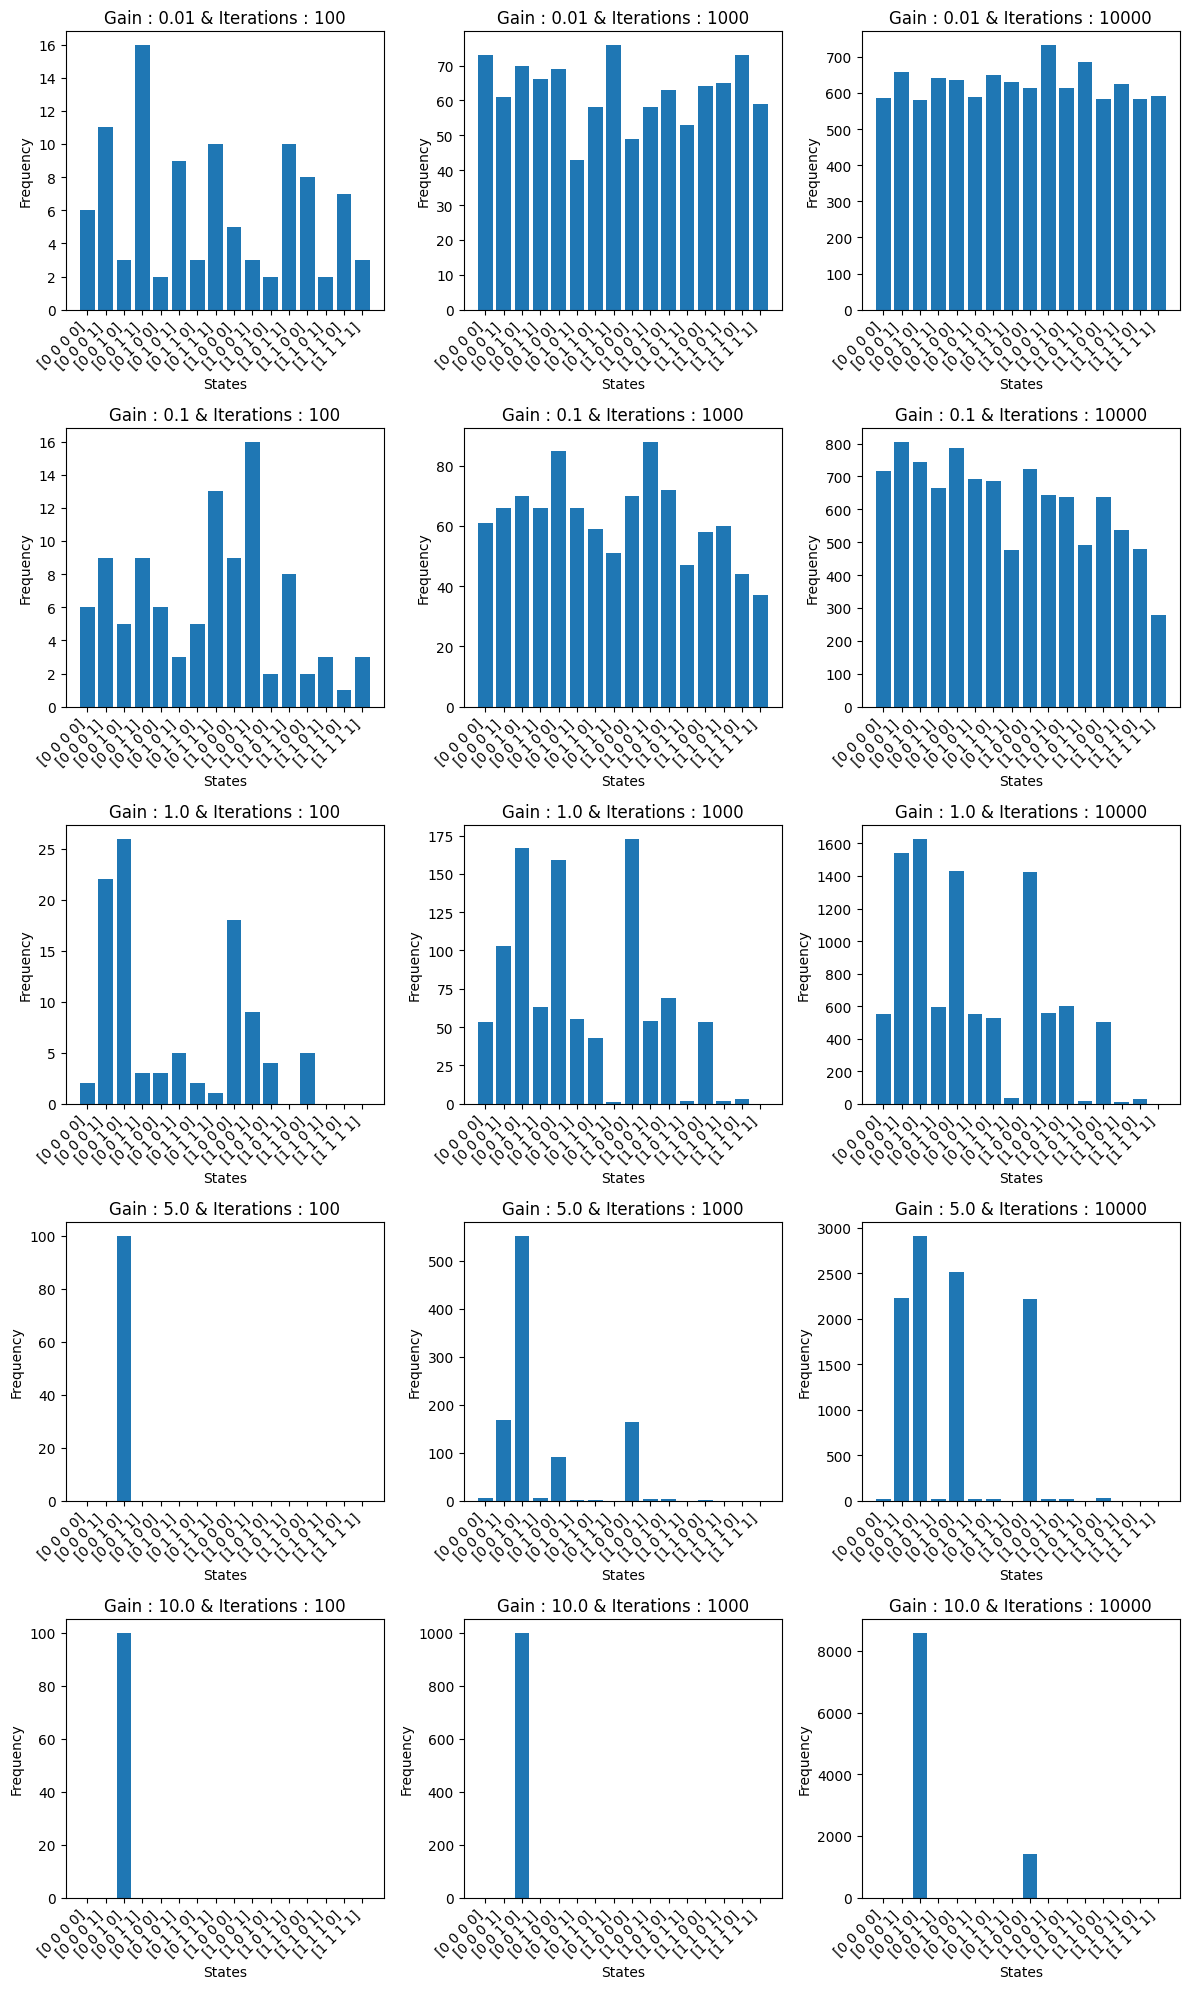

Initial state: [1 0 1 0], Update order: Forward
Optimal state (Probabilistic)
╒════════╤══════════════╤═════════════════╤═══════════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│   Gain │   Iterations │   Max frequency │ Max frequency state   │   [0 0 0 0] │   [0 0 0 1] │   [0 0 1 0] │   [0 0 1 1] │   [0 1 0 0] │   [0 1 0 1] │   [0 1 1 0] │   [0 1 1 1] │   [1 0 0 0] │   [1 0 0 1] │   [1 0 1 0] │   [1 0 1 1] │   [1 1 0 0] │   [1 1 0 1] │   [1 1 1 0] │   [1 1 1 1] │
╞════════╪══════════════╪═════════════════╪═══════════════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│   0.01 │          100 │              16 │ (0

In [40]:
# Probabilistic
X, _ = dict_states(N)
W = np.full((N, N), -2)
np.fill_diagonal(W, 0)
threshold = np.full(N, -1)
Gain = np.array([0.01, 0.1, 1, 5, 10])
Iteration = np.array([100, 1000, 10000])
X_int = X[random.randint(0, len(X)-1)]
update_order = 'F'

headers = ["Gain", "Iterations", "Max frequency", "Max frequency state"]
states = [str(state) for state in X]
headers.extend(states)
results = []

plt.figure(figsize=(4 * len(Iteration), 4 * len(Gain)))

count = 1
for gain in Gain:
    for iteration in Iteration:
        X_dict = {tuple(state): 0 for state in X}
        X_int_c = np.copy(X_int)
        rnn_optimization_prob(X_int_c, W, threshold, gain, iteration, X_dict, update_order=update_order)

        max_state = max(X_dict, key=X_dict.get)
        max_frequency = X_dict[max_state]
        frequencies = list(X_dict.values())

        results.append([f"{gain:.2f}", iteration, max_frequency, str(max_state)] + frequencies)

        plt.subplot(len(Gain), len(Iteration), count)
        plt.bar(range(len(states)), frequencies, tick_label=states)
        plt.title(f"Gain : {gain} & Iterations : {iteration}")
        plt.xlabel("States")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')

        count += 1

plt.tight_layout()
plt.show()
print(f"Initial state: {X_int}, Update order: {'Forward' if update_order == 'F' else 'Reversed'}")
print("Optimal state (Probabilistic)")
print(tabulate(results, headers=headers, tablefmt='fancy_grid'))

# TASK 4

In [41]:
#TASK 4
def compute_rnn_constant(energy_function, N):
    X = np.zeros(N)
    return energy_function(X)

def compute_rnn_thresholds(energy_function, N, C):
    X = np.zeros((N, N))
    np.fill_diagonal(X, 1)
    thresholds = np.array([energy_function(X[i]) - C for i in range(N)])
    return thresholds

def compute_rnn_weights(energy_function, N, C, thresholds):
    X = np.zeros((N, N))
    np.fill_diagonal(X, 1)
    W = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i != j:
                X_c = X[i] + X[j]
                W[i, j] = thresholds[i] + thresholds[j] + C - energy_function(X_c)
    return W

def compute_rnn_attribute(energy_function, N):
    C = compute_rnn_constant(energy_function, N)
    thresholds = compute_rnn_thresholds(energy_function, N, C)
    W = compute_rnn_weights(energy_function, N, C, thresholds)
    return C, thresholds, W

def energy_function_task4(X):
    term1 = (X[0] - 2*X[1] + X[2] - X[3] - 1)**2
    term2 = (-X[0] - X[1] + X[2] + 2*X[3] - 2)**2
    term3 = (2*X[0] + X[1] - X[2] + X[3] - 2)**2
    term4 = (-2*X[0] + 3*X[1] - 2*X[2] - X[3] + 5)**2
    return term1 + term2 + term3 + term4

In [42]:
#TASK 4 continue
N = 4
C, threshold, W = compute_rnn_attribute(energy_function_task4, N)

print(f"C = {C}")
for i in range(N):
    print(f"Zeta{i+1} = {threshold[i]:.4f}")

for i in range(N):
    weights = ', '.join([f"W{i+1}{j+1} = {W[i][j]:.4f}" for j in range(N)])
    print(f"{weights}")

C = 34.0
Zeta1 = -16.0000
Zeta2 = 49.0000
Zeta3 = -15.0000
Zeta4 = -13.0000
W11 = 0.0000, W12 = 10.0000, W13 = -4.0000, W14 = -2.0000
W21 = 10.0000, W22 = 0.0000, W23 = 20.0000, W24 = 4.0000
W31 = -4.0000, W32 = 20.0000, W33 = 0.0000, W34 = -4.0000
W41 = -2.0000, W42 = 4.0000, W43 = -4.0000, W44 = 0.0000


In [43]:
#TASK 4 continue
X, energy_dict = dict_states(N)

for states in energy_dict:
    energy = rnn_energy(states, W, threshold, C=0)
    energy_dict[states] = energy

## Deterministic

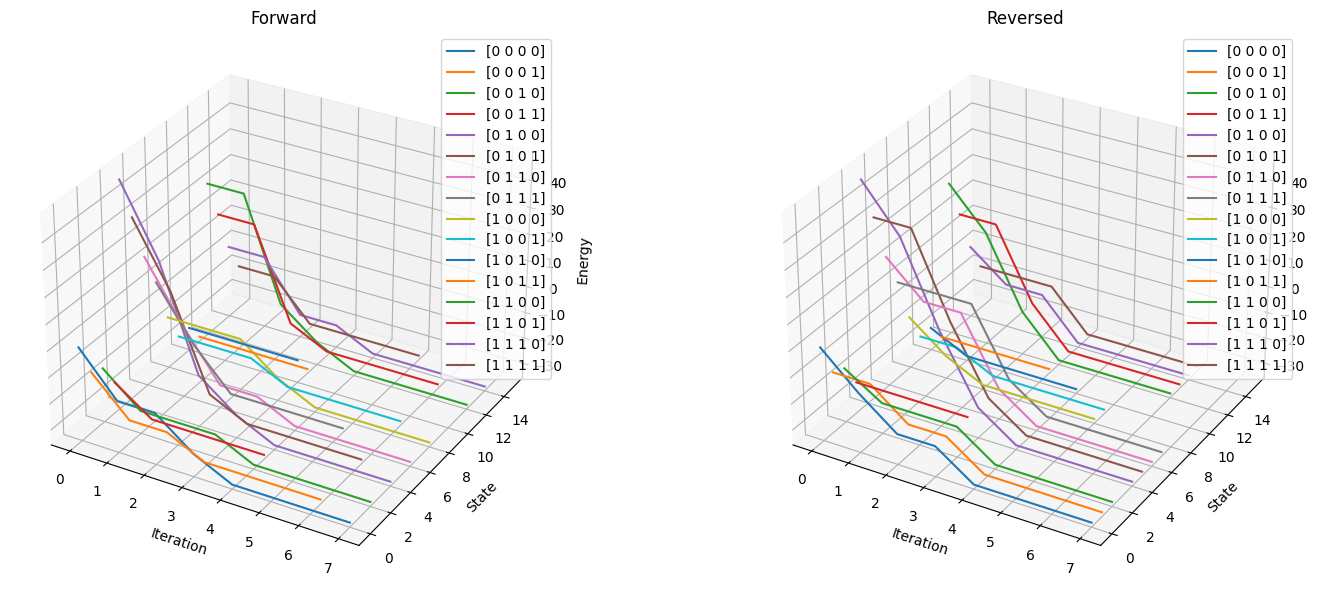

Optimal state (Deterministic)
╒═════════════════╤════════════════════════════════╤═════════════════════════════════╕
│ Initial state   │ Optimal state(Forward order)   │ Optimal state(Reversed order)   │
╞═════════════════╪════════════════════════════════╪═════════════════════════════════╡
│ (0, 0, 0, 0)    │ (1, 0, 1, 1)                   │ (1, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 0, 0, 1)    │ (1, 0, 1, 1)                   │ (1, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 0, 1, 0)    │ (1, 0, 1, 1)                   │ (1, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 0, 1, 1)    │ (1, 0, 1, 1)                   │ (0, 0, 1, 1)                    │
├─────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ (0, 1, 0, 0

In [44]:
# Deterministic
update_seq_forward = []
update_seq_reversed = []
table_data_deter = []
for X_int in X:
  X_int_c = np.copy(X_int)

  X_optimizal, X_seq_f = rnn_optimization_deter(X_int_c, W, threshold, update_order='F')
  update_seq_forward.append(X_seq_f)
  table_data_deter_row = [tuple(X_int), tuple(X_optimizal)]

  X_int_c = np.copy(X_int)
  X_optimizal, X_seq_r = rnn_optimization_deter(X_int_c, W, threshold, update_order='R')
  update_seq_reversed.append(X_seq_r)
  table_data_deter_row.append(tuple(X_optimizal))
  table_data_deter.append(table_data_deter_row)

energy_forward = []
energy_sequence_state(update_seq_forward, energy_dict, energy_forward)
energy_reversed = []
energy_sequence_state(update_seq_reversed, energy_dict, energy_reversed)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': '3d'})
plot_3D(energy_forward, 0, X, "Forward")
plot_3D(energy_reversed, 1, X, "Reversed")
plt.tight_layout()
plt.show()

print("Optimal state (Deterministic)")
headers = ["Initial state", "Optimal state(Forward order)", "Optimal state(Reversed order)"]
print(tabulate(table_data_deter, headers=headers, tablefmt='fancy_grid'))

## Probabilistic

Initial state : [1 0 1 1] & Update order : Forward


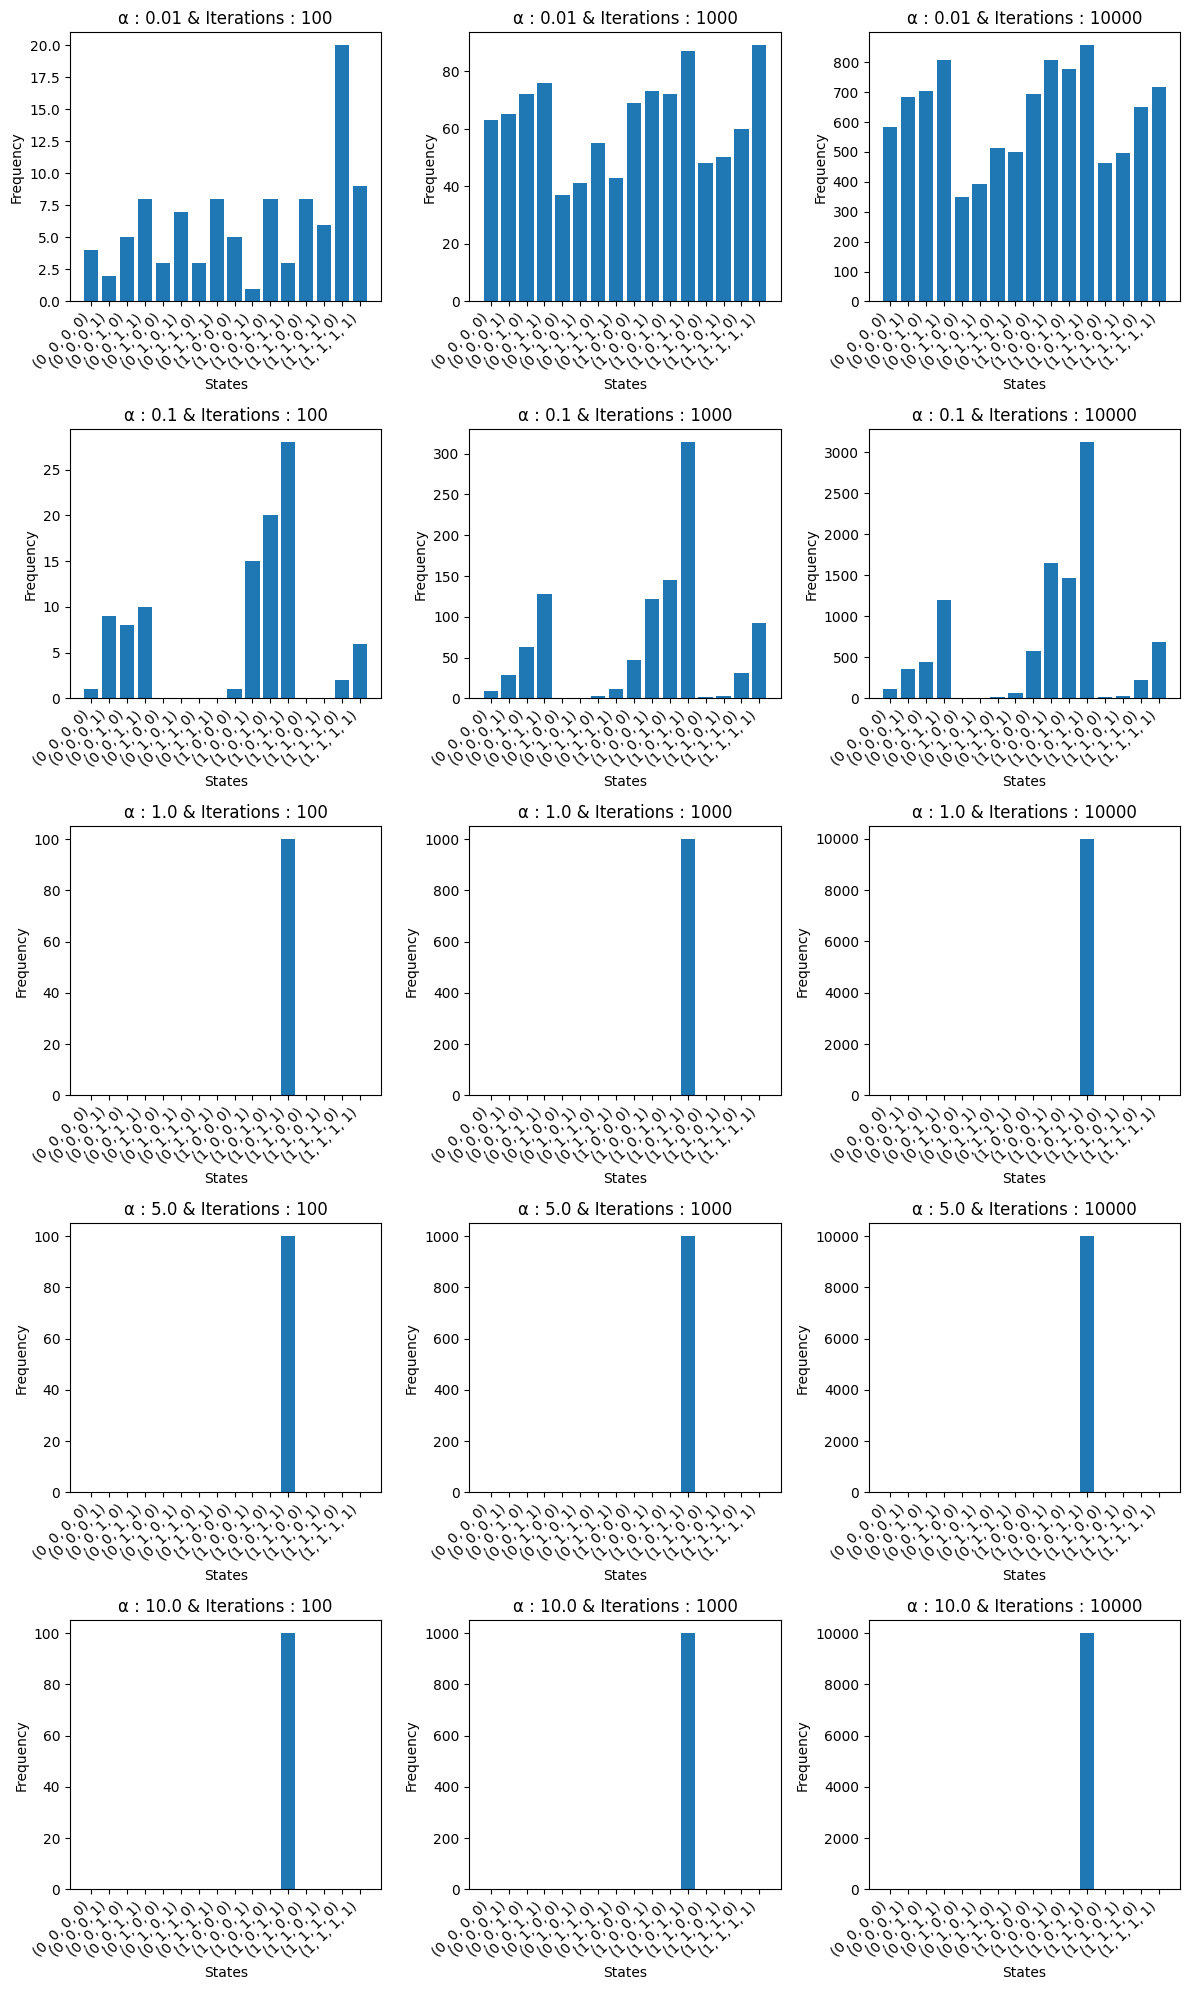

Optimal state (Probabilistic)
╒════════╤══════════════╤═════════════════╤═══════════════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╕
│   Gain │   Iterations │   Max frequency │ Max frequency state   │   State 1 │   State 2 │   State 3 │   State 4 │   State 5 │   State 6 │   State 7 │   State 8 │   State 9 │   State 10 │   State 11 │   State 12 │   State 13 │   State 14 │   State 15 │   State 16 │
╞════════╪══════════════╪═════════════════╪═══════════════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│   0.01 │          100 │              20 │ (1, 1, 1, 0)          │         4 │         2 │         5 │         8 │         3 │         7 │         3 │         8 │      

In [45]:
# Probabilistic
# Input
N = 4
_, X_dict = dict_states(N)
Gain = np.array([0.01, 0.1, 1, 5, 10])
Iteration = np.array([100, 1000, 10000])
X_int = X[random.randint(0, len(X)-1)]
update_order = 'F'
print(f"Initial state : {X_int} & Update order : {'Forward' if update_order == 'F' else 'Reversed'}")

headers = ["Gain", "Iterations", "Max frequency", "Max frequency state"] + ["State " + str(i+1) for i in range(len(X_dict))]
results = []

plt.figure(figsize=(4 * len(Iteration), 4 * len(Gain)))

for gain_idx, gain in enumerate(Gain):
    for iter_idx, iteration in enumerate(Iteration):
        X_dict = {state: 0 for state in X_dict}
        X_int_c = np.copy(X_int)
        rnn_optimization_prob(X_int_c, W, threshold, gain, iteration, X_dict, update_order)

        max_state = max(X_dict, key=lambda key: X_dict[key])
        frequencies = list(X_dict.values())

        result_row = [f"{gain:.2f}", iteration, X_dict[max_state], str(max_state)] + frequencies
        results.append(result_row)

        plt.subplot(len(Gain), len(Iteration), gain_idx * len(Iteration) + iter_idx + 1)
        plt.bar(range(len(X_dict)), frequencies)
        plt.title(f"α : {gain} & Iterations : {iteration}")
        plt.xlabel("States")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.xticks(range(len(X_dict)), labels=[str(state) for state in X_dict.keys()])

plt.tight_layout()
plt.show()

print("Optimal state (Probabilistic)")
print(tabulate(results, headers=headers, tablefmt='fancy_grid'))

# TASK 5

In [46]:
# TASK 5
def rnn_optimization_prob_8q(X, W, threshold, alpha, iterations, dictionary, update_order='F'):
  if update_order == 'R':
    indices = np.arange(len(X) - 1, -1, -1)
  else:
    indices = np.arange(len(X))
  indices = itertools.cycle(indices)
  X_old = np.copy(X)
  count = 0
  for i, update_index in zip(range(iterations), indices):
    W_update = W[update_index]
    X = rnn_update_prob(X, W_update, threshold, alpha, update_index)

    if (X == X_old).all():
      count += 1
    elif count >= 1:
      current_state = tuple(X)
      if current_state in dictionary:
        dictionary[current_state] += count
      else:
        dictionary[current_state] = count
      count = 0
    else:
      count = 0
    X_old = np.copy(X)
  return dictionary

def energy_function_qproblem_horizontal(X):
  Eh = 0
  n = int(np.sqrt(len(X)))
  X = np.array(X).reshape((n, n))
  for i in range(len(X)):
    sum = 0
    for j in range(len(X)):
      sum += X[i][j]
    Eh += (sum-1)**2
  return Eh

def energy_function_qproblem_vertical(X):
  Ev = 0
  n = int(np.sqrt(len(X)))
  X = np.array(X).reshape((n, n))
  for j in range(len(X)):
    sum = 0
    for i in range(len(X)):
      sum += X[i][j]
    Ev += (sum-1)**2
  return Ev

def energy_function_qproblem_diagonal(X):
  Ed = 0
  n = int(np.sqrt(len(X)))
  X = np.array(X).reshape((n, n))
  for i in range(len(X)):
    for j in range(len(X)):
      sum1 = 0
      sum2 = 0
      for d in range(-len(X), len(X)):
        if 0 <= i+d <= len(X)-1 and 0 <= j+d <= len(X)-1:
          sum1 += X[i+d][j+d]
      for d in range(-len(X), len(X)):
        if 0 <= i+d <= len(X)-1 and 0 <= j-d <= len(X)-1:
          sum2 += X[i+d][j-d]
      Ed += X[i][j]*(sum1+sum2-2*X[i][j])
  return Ed

def energy_function_4_queen(X):
  Eh = energy_function_qproblem_horizontal(X)
  Ev = energy_function_qproblem_vertical(X)
  return Eh+Ev

def energy_function_8_queen(X):
  Eh = energy_function_qproblem_horizontal(X)
  Ev = energy_function_qproblem_vertical(X)
  Ed = energy_function_qproblem_diagonal(X)
  return Eh+Ev+Ed

def draw_chess_board(X, title):
  n = int(np.sqrt(len(X)))
  chessboard = np.array(X).reshape((n, n))
  print(f"chessboard \n{chessboard}")
  fig, ax = plt.subplots()
  ax.set_xticks(range(n+1))
  ax.set_yticks(range(n+1))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.invert_yaxis()

  for row in range(n):
    for col in range(n):
      color = 'white' if (row + col) % 2 == 0 else 'blue'
      ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=True, color=color))

  for row in range(n):
    for col in range(n):
      if chessboard[row][col] == 1:
        color = 'white' if (row + col) % 2 == 0 else 'blue'
        ax.text(col + 0.5, row + 0.5, u'\u265B', fontsize=30, ha='center', va='center', color='white' if color == 'blue' else 'blue')
  plt.grid(True)
  ax.set_title(title)

## 4 Queens

C: 8.0
Threshold: [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
W: 
[[ 0. -2. -2. -2. -2.  0.  0.  0. -2.  0.  0.  0. -2.  0.  0.  0.]
 [-2.  0. -2. -2.  0. -2.  0.  0.  0. -2.  0.  0.  0. -2.  0.  0.]
 [-2. -2.  0. -2.  0.  0. -2.  0.  0.  0. -2.  0.  0.  0. -2.  0.]
 [-2. -2. -2.  0.  0.  0.  0. -2.  0.  0.  0. -2.  0.  0.  0. -2.]
 [-2.  0.  0.  0.  0. -2. -2. -2. -2.  0.  0.  0. -2.  0.  0.  0.]
 [ 0. -2.  0.  0. -2.  0. -2. -2.  0. -2.  0.  0.  0. -2.  0.  0.]
 [ 0.  0. -2.  0. -2. -2.  0. -2.  0.  0. -2.  0.  0.  0. -2.  0.]
 [ 0.  0.  0. -2. -2. -2. -2.  0.  0.  0.  0. -2.  0.  0.  0. -2.]
 [-2.  0.  0.  0. -2.  0.  0.  0.  0. -2. -2. -2. -2.  0.  0.  0.]
 [ 0. -2.  0.  0.  0. -2.  0.  0. -2.  0. -2. -2.  0. -2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0. -2.  0. -2. -2.  0. -2.  0.  0. -2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0. -2. -2. -2. -2.  0.  0.  0.  0. -2.]
 [-2.  0.  0.  0. -2.  0.  0.  0. -2.  0.  0.  0.  0. -2. -2. -2.]
 [ 0. -2.  0.  0.  0. -2.  0.  0.  0. -2.

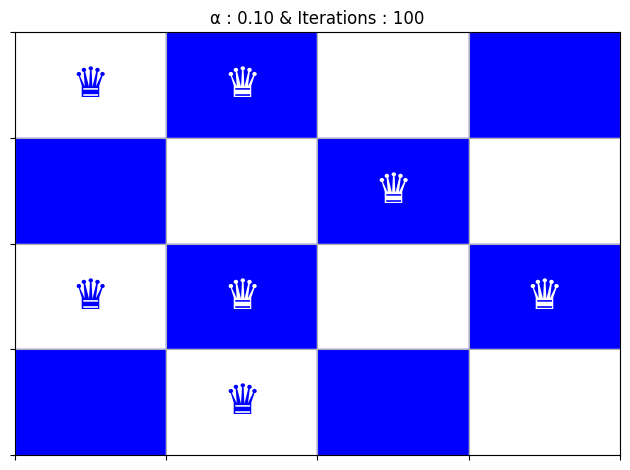

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 0 1]
 [0 0 1 0]
 [1 0 1 0]
 [0 0 0 0]]


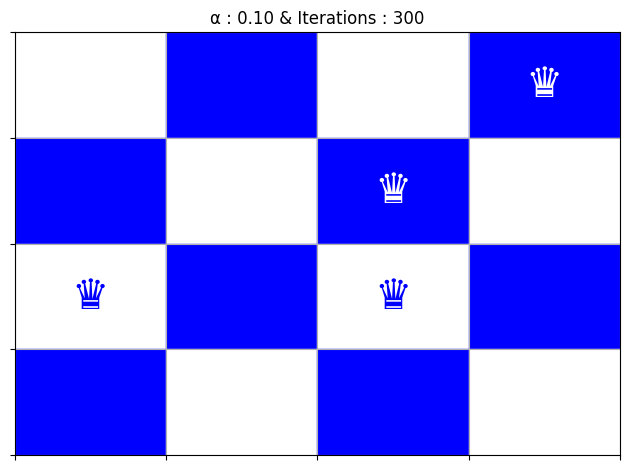

----------------------------------------------------------------------------------------------------
chessboard 
[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]]


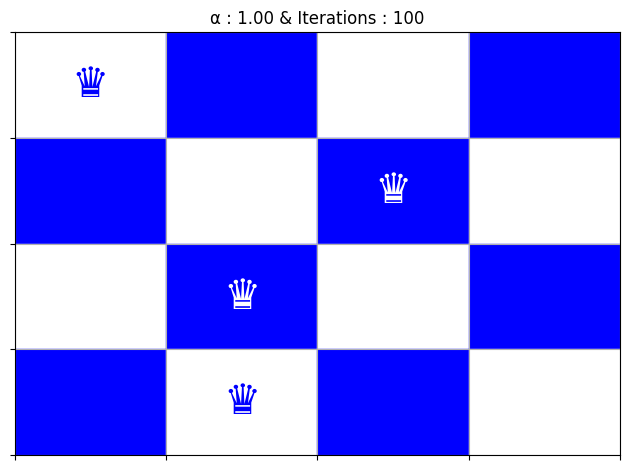

----------------------------------------------------------------------------------------------------
chessboard 
[[1 0 0 0]
 [1 0 0 0]
 [0 1 0 1]
 [0 0 1 0]]


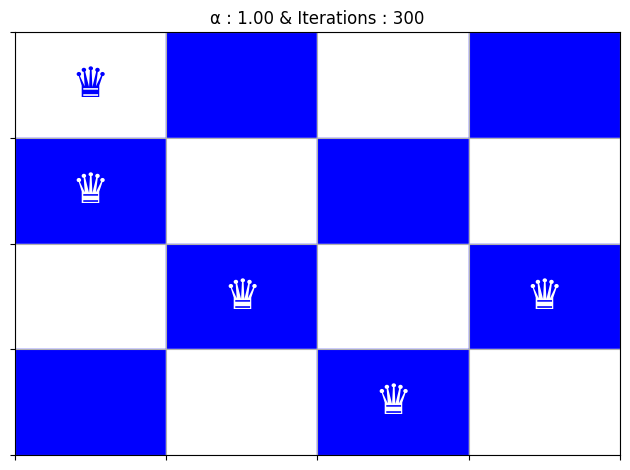

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]


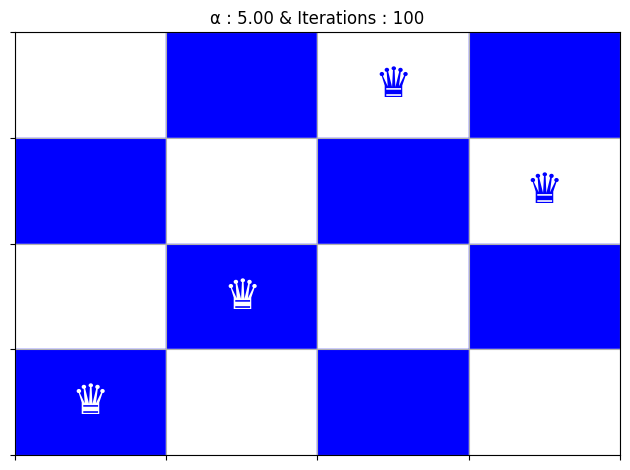

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


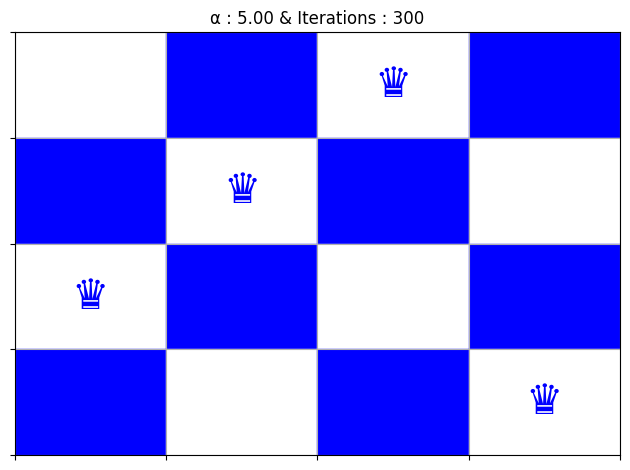

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


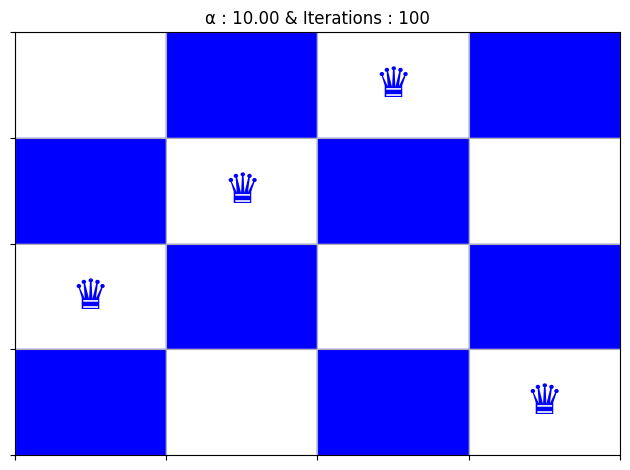

----------------------------------------------------------------------------------------------------
chessboard 
[[1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]]


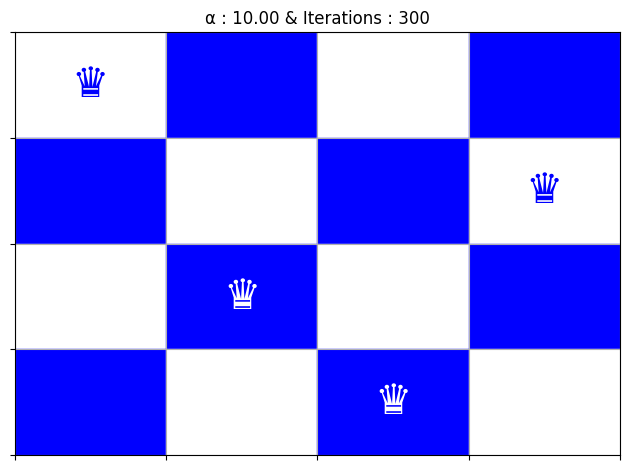

In [47]:
#TASK 5  4 queens
N = 16
C, threshold, W = compute_rnn_attribute(energy_function_4_queen, N)

print(f"C: {C}")
print(f"Threshold: {threshold}")
print(f"W: \n{W}")

X, X_dict = dict_states(N)
Gain = np.array([0.1, 1, 5, 10])
Iteration = np.array([100, 300])
X_int = X[random.randint(0, X.shape[0]-1)]
update_order = 'F'
print(f"Initial state: {X_int}, Update order: {'Forward' if update_order == 'F' else 'Reversed'}")

headers = ["Gain", "Iterations", "Max frequncy", "Max frequncy state", "Energy"]
results = []

for gain in Gain:
  for iter in Iteration:
    X_int_c = np.copy(X_int)
    rnn_optimization_prob(X_int_c, W, threshold, gain, iter, X_dict, update_order=update_order)
    max_state = max(X_dict.keys(), key=lambda k: X_dict[k])
    energy = energy_function_4_queen(max_state)
    result_row = [f"{gain:.2f}", iter, X_dict[max_state], max_state, energy]
    results.append(result_row)
    X_dict.update({state: 0 for state in X_dict})

print("Optimal state (Probabilistic)")
table = tabulate(results, headers=headers, tablefmt='fancy_grid')
print(table)

for i in range(len(results)):
  print("-"*100)
  title = "α : " + str(results[i][0]) + " & Iterations : " + str(results[i][1])
  draw_chess_board(results[i][3], title)
  plt.tight_layout()
  plt.show()

## 8 Queens

In [ ]:
#TASK 5  8 queens
N = 64
C = compute_rnn_constant(energy_function_8_queen, N)
threshold = compute_rnn_thresholds(energy_function_8_queen, N, C)
W = compute_rnn_weights(energy_function_8_queen, N, C, threshold)

In [50]:
#TASK 5 Probabilistic
X_int = np.random.randint(2, size=N)
X_dict = {}
Gain = np.array([1, 5])
Iteration = np.array([50000, 100000, 10000000])
update_order = 'F'
print(f"Initial state: {X_int}, Update order: {'Forward' if update_order == 'F' else 'Reversed'}")

Initial state: [1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0], Update order: Forward


Optimal state (Probabilistic)
╒════════╤══════════════╤════════════════╤══════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│   Gain │   Iterations │   Max frequncy │   Energy │ Max frequncy state                                                                                                                                                                               │
╞════════╪══════════════╪════════════════╪══════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│      1 │    50000     │             92 │        4 │ (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 

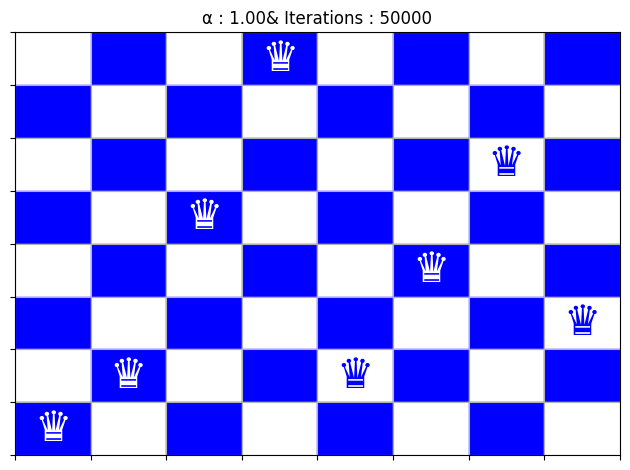

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]]


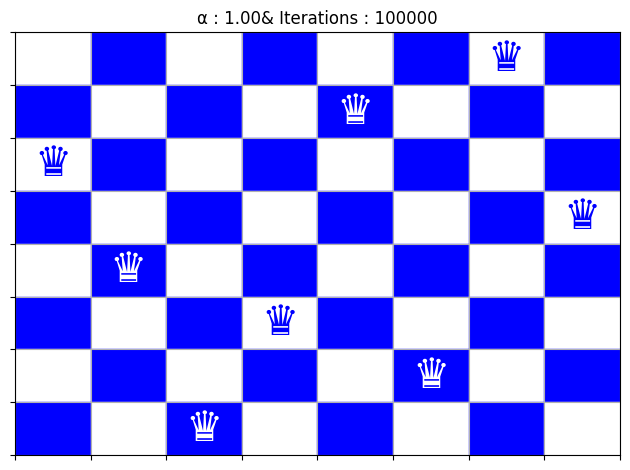

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


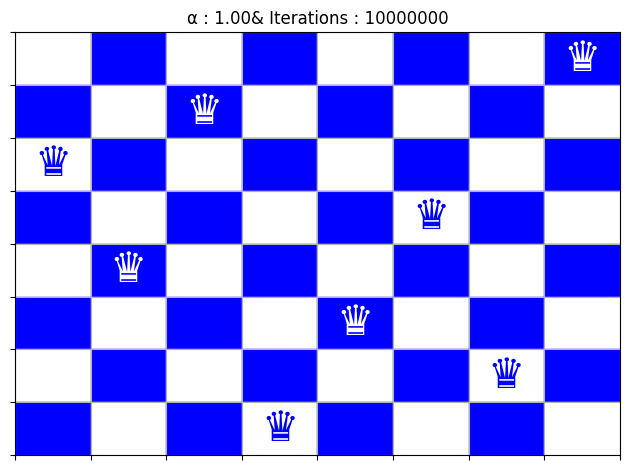

----------------------------------------------------------------------------------------------------
chessboard 
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


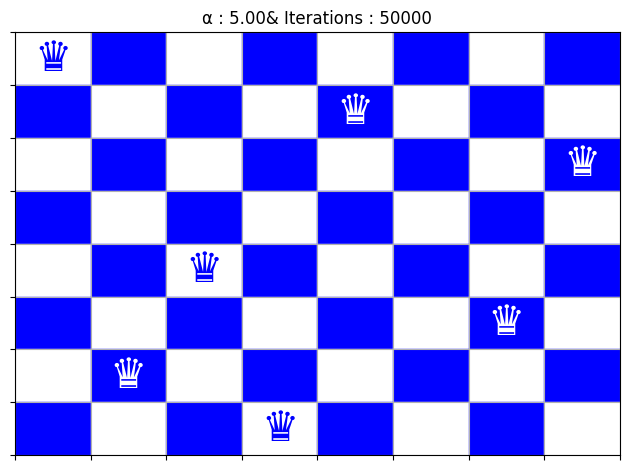

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]]


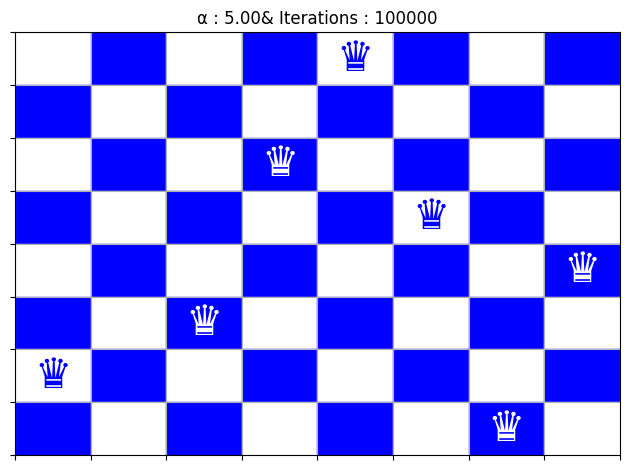

----------------------------------------------------------------------------------------------------
chessboard 
[[0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 1 0 0 0 0 0]]


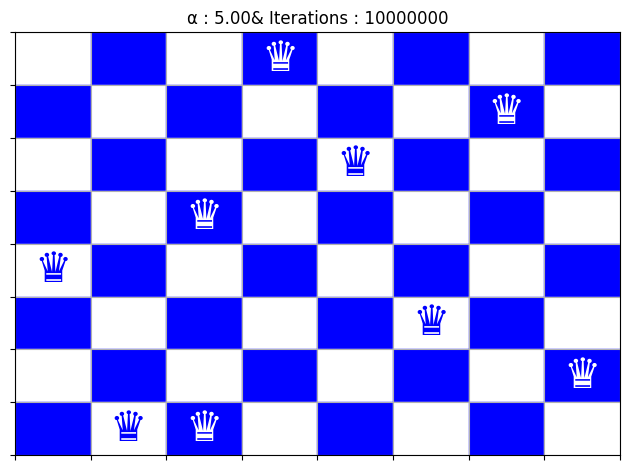

In [51]:
#TASK 5  table
headers = ["Gain", "Iterations", "Max frequncy", "Energy", "Max frequncy state"]
results = []

for gain in Gain:
  for iter in Iteration:
    X_int_c = np.copy(X_int)
    rnn_optimization_prob_8q(X_int_c, W, threshold, gain, iter, X_dict, update_order=update_order)
    max_state = max(X_dict.keys(), key=lambda k: X_dict[k])
    energy = energy_function_8_queen(max_state)
    result_row = [f"{gain:.2f}", iter, X_dict[max_state], energy, max_state]
    results.append(result_row)
    X_dict.update({state: 0 for state in X_dict})
print("Optimal state (Probabilistic)")
table = tabulate(results, headers=headers, tablefmt='fancy_grid')
print(table)
for i in range(len(results)):
  print("-"*100)
  title = "α : " + str(results[i][0]) + "& Iterations : " + str(results[i][1])
  draw_chess_board(results[i][4], title)
  plt.tight_layout()
  plt.show()